                    Code for the cosmology of Entangled Relativity

In this code we are going to determine the evolution of the universe in ER. In this theory the equation are given by:\
$ 3H^2 \left(1+\frac{\phi_{,N}}{\phi} \right)=\frac{\bar{\kappa}}{\sqrt{\phi}}\rho+\frac{V(\phi)}{2\phi}-3Ke^{-2N}$\
$HH_{,N}=-\frac{\bar{\kappa}}{2\sqrt{\phi}}p-\frac{3}{2}H^2+H^2\frac{\phi_{,N}}{2\phi} +\frac{V(\phi)}{4\phi}-\frac{K}{2}e^{-2N}$\
$\phi_{,NN}=-(3H+H_{,N})\phi_{,N}\frac{1}{H} \iff \phi_{,N}=\phi_{0,N} \frac{H_0}{H}e^{-3N}$\
 \
 Because we know the conditions today, we are going to use them and make the simulation by going backward.
To "stop" the simulation here we are going to use the constraint on density, we read the value when $\rho_{radiation}>0.1\rho_{dust}$. \
Here to make the Klein-Gordon equation unsourced, otherwise it will implies a variation of $\phi$ and of $G$, we are going to use a quadratic potential.\
$V(\phi)=2\lambda\phi^2$\
We can determine both $\kappa$ and $\lambda$ to match with GR and recovers the cosmological constant.

Libraries needed

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

We are going to use a system of units where $\mu=\hbar=c=1$

In [282]:
conversionkg=1/(1.78*10**(-27)) #GeV=1 Kg
conversions=6.58*10**(-25)      #GeV=1s-1
conversionm=1.97*10**(-16)      #GeV=1m-1

To convert s$\rightarrow$yr

In [283]:
enl=0
conversionstoyr=1/(60*60*24*365.25*10**(enl))

In [284]:
conversionGeVm1toyr=conversions*conversionstoyr

To convert $s^{-1}\rightarrow$km/s/Mpc

In [285]:
conversionH0tosm1=np.pi*10**(3)/(648000*149597870700*10**6)   # To convert H0 in the usual dimensions

Which value of $H_0$ do you want to use?\
s for supernovae\
c for CMB

In [286]:
HM="s"

We determine the constant in the new system of units

In [287]:
#Constantes:
G=(6.67428+0.00015)*10**(-11)*(conversions**2)/((conversionm**3)*conversionkg)    #pm 0.00015.10**-11
kappa=np.sqrt(8*np.pi*G)   #GeV-1
Lambda=1.1056*10**(-52)*(conversionm**2)
if HM=="c":
    H0=67.4*conversionH0tosm1*conversions     #pm 0.5    =[66.9,67.9]  67.4
elif HM=="s":
    H0=73.0*conversionH0tosm1*conversions       #pm 1.0  =[72.0,74.0]  73.0
rhoc0=3*H0**2/(kappa**2)
c=299792458
a0=1

In [288]:
print(H0)

1.5566759238917063e-42


                Code we are going to use

    In Entangled Relativity

Let's define some usual fonction :\
quadratic potential\
$\rho(a)$ only for dust\
Solution of the Klein-Gordon equation.

In [289]:
def V(phi,lambd):         # the potential
    return(2*lambd*phi**2)

In [290]:
def rhoanda(rho0,a,w,a0):               # The usual fonction for the density
    return(rho0*(a/a0)**((-3*(1+w))))

def atophip(a,phip0,a0,H0,H):          # Expression of phip thanks to KG equations
    return(phip0*(H0/H)*(a/a0)**(-3))

def Ntophip(N,H,H0,phip0):              #Same but with N and not a
    return(phip0*(H0/H)*np.exp(-3*N))

def atoH(a,H0,phip0,phip):              #Solution of Klein-Gordon equation   
    return((phip0*H0/phip)*(a/a0)**(-3))

def NtoH(N,H0,phip0,phip):              #Same but with N and not a             
    return((phip0*H0/phip)*np.exp(-3*N))

We can find the analytical solution for universe with only one components:\
$\phi(N)=[\phi_{0,N}\phi_0^{\frac{1}{2}(1-3w)}(1-e^{\frac{3}{2}N(w-1)})+\phi_0^{\frac{3}{2}(1-w)}]^{\frac{2}{3(1-w)}}$\
$H=H_0(\frac{\phi}{\phi_0})^{\frac{1}{2}(1-3w)}e^{-\frac{3}{2}N(w+1)}$

In [291]:
#With one components:

def atophionec(phi0,phip0,a,a0,w):                #phi(a)
    return((phip0*phi0**((1-3*w)/2)*(1-(a/a0)**(-3*(1-w)/2))+phi0**(3*(1-w)/2))**(2/(3*(1-w))))

def Ntophionec(phi0,phip0,N,w):                   #phi(N)
    return((phip0*phi0**((1-3*w)/2)*(1-np.exp(N*(-3*(1-w)/2)))+phi0**(3*(1-w)/2))**(2/(3*(1-w))))

def atoHonec(H0,phi0,phip0,a,a0,w):               #H(a)
    return(H0*atophionec(phi0,phip0,a,a0,w)**((1-3*w)/2)*(a/a0)**(-3*(1+w)/2))

def atoHonecrad(H0,phi0,phip0,a,a0):               #H(a) for radiation
    return(H0*(a/a0)**(-2))

def NtoHonec(H0,phi0,phip0,N,w):                  #H(N)
    return(H0*atophionec(phi0,phip0,a,a0,w)**((1-3*w)/2)*np.exp(-3*N*(1+w)/2))

Solution for a more complex universe with Ansatz method

In [292]:
def aphitest(phi0,phip0,phipp0,rhom0,rhora0,wm,wra,lambd,H0,Hp0,an):     #phi(a)
    rho=rhom0+rhora0
    p=wm*rhom0+wra*rhora0
    pp=-3*(wm*rhom0*(1+wm)+wra*rhora0*(1+wra))
    A1=kappabar/2*(-pp/(np.sqrt(phi0*H0**2))+p/(phi0*H0**3)*(phip0*H0/(2*np.sqrt(phi0))+2*np.sqrt(phi0)*Hp0))
    A2=(1/2)*(phipp0/phi0-(phip0/phi0)**2)
    A3=(lambd/2)*(phip0/(H0**2)-2*Hp0*phi0/(H0**3))
    print(A1,A2,A3)
    A=-(A1+A2+A3)
    B=phip0/phi0*(phipp0/phip0-phip0/phi0)
    d=B/(B-A)
    b=-3/2-lambd*phi0/(2*H0**2)+phip0/phi0*(1/d-3/2)
    a=-phip0*phi0**(1/d-1)/(b*d)
    c=phi0**(1/d)
    #print(b*d)
    #print(a,b,c,d)
    return((a*(1-(an**b))+c)**d)

                                    Set of equations

We are going to use:\
$3H^2$(1+$\frac{\phi_{,N}}{\phi}$)=$\frac{\kappa\rho}{\sqrt{\phi}}$+$\lambda\phi$\
with:\
$\phi_{,N}=\phi_{0,N}(\frac{H_0}{H})e^{-3N}$\
which gives us a quadratic equation to solve and gives the function of $H(\phi)$

We know the conservation of the stress-energy tensor gives us:\
For dust :
$\rho_{a}=\rho_{0a} \left(\frac{a}{a_0} \right)^{-3(1+w_a)}$\
For radiation : $\rho_{rad}=\rho_{0 rad} \left(\frac{a}{a_0} \right)^{-3(1+w)} \left(\frac{\phi}{\phi_0} \right)^{-\frac{1}{2}}$\
To compute the solution so we only will use a solver of differential equation on $\phi$. 

In [293]:
def systemeBDN(n,Y,phi0,phip0,H0,rhom0,rhora0,kappabar,wm,wra,K,lambd):    #Set of equation if phi isn't constant (we can normalize)
    phi=Y[0]             #scalar field
    
    xm=np.longdouble(-3*(1+wm)*n)
    xra=np.longdouble(-3*(1+wra)*n)
        
    rhom=rhom0*np.exp(xm)          #Dust density
    rhora=rhora0*np.sqrt(phi0/phi)*np.exp(xra)   #radiation density
    
    B=phip0*H0*np.exp(-3*n)/phi
    C=kappabar*(rhom+rhora)/(3*np.sqrt(phi))+V(phi,lambd)/(6*phi)
    delta=B*B+4*C
    H=(-B+np.sqrt(delta))/2
    
    phip=phip0*(H0/H)*np.exp(-3*n)
        
    return([phip])

        Solve the system

In [294]:
def solveBDN(phi0,H0ER,rhom0,rhora0,phip0,kappabar,wm,wra,Dn,K,lambd):
    a0=np.exp(Dn[0])
    if a0!=1:                        #Check if it start today
        print("Doesn't start well.")
    N=10**(7-enl)                    #Number of points for the simulation
    
    efolds=np.linspace(Dn[0],Dn[1],N)  #Points use for the simulation
    
    solution = solve_ivp(systemeBDN, Dn, [phi0], method='Radau', t_eval=efolds, args=(phi0,phip0,H0,rhom0,rhora0,kappabar,wm,wra,K,lambd),rtol=5*10**-12)  #Resolution of the set
    if solution.success== False:       #Has the code run well:
        print(solution)
    return(solution)

                To plot

The set of equations we use is:\
$ 3H^2 \left(1+\frac{\phi_{,N}}{\phi} \right)=\frac{\bar{\kappa}}{\sqrt{\phi}}\rho+\frac{V(\phi)}{2\phi}-3Ke^{-2N}$\
$HH_{,N}=-\frac{\bar{\kappa}}{2\sqrt{\phi}}p-\frac{3}{2}H^2+H^2\frac{\phi_{,N}}{2\phi} +\frac{V(\phi)}{4\phi}-\frac{K}{2}e^{-2N}$\
$\phi_{,NN}=-(3H+H_{,N})\phi_{,N}\frac{1}{H}$\
$\frac{\dot{G}_{eff}}{G_{eff}}=-\frac{1}{2}\frac{\dot{\phi}_0}{\phi_0}$

In [295]:
def plotBDN(solution,phi0,rhom0,rhora0,phip0,kappabar,wm,wra,Dn,K,lambd,H0,X):
    Y=solution.y          
    N=solution.t                   
    A=np.exp(N)
 
    Al=False      #If X="A", we plot everything
    if X=="A":
        Al=True
    H0ob=H0
    
    phi=Y[0]        #scalar field
    
    rhom=rhom0*np.exp(-3*(1+wm)*N)                        #Dust density
    rhora=rhora0*np.sqrt(phi0/phi)*np.exp(-3*(1+wra)*N)   #radiation density
    
    p=wm*rhom+wra*rhora                #total pressure
    
    H0er=np.sqrt((kappabar*(rhom0+rhora0)/(3*np.sqrt(phi0))+V(phi0,lambd)/(6*phi0))/(1+phip0/phi0))   #Hubble parameter in ER today
        
    B=phip0*H0er*np.exp(-3*N)/phi
    C=kappabar*(rhom+rhora)/(3*np.sqrt(phi))+V(phi,lambd)/(6*phi) 
    delta=B*B+4*C
    H=(-B+np.sqrt(delta))/2            #Hubble parameter in ER
    
    phip=phip0*(H0er/H)*np.exp(-3*N)     #Derivative of phi in respect of the number of e-folds

    H0ER=H[0]        #The value of H today in this theory (=H0)
    
    print("The value of H0 (ob) is "+str(H0ob/conversions/conversionH0tosm1)+" km/s/Mpc")   #The value which is obseved
    print("The value of H0 (ER) is "+str(H0ER/conversions/conversionH0tosm1)+" km/s/Mpc")
    
    Hp=-kappabar*p/(2*np.sqrt(phi))-3*H/2+H*phip/(2*phi)+V(phi,lambd)/(4*H*phi)  #The derivative of H in respect of the number of e-folds
    
    phipp=-3*phip-Hp*phip/H       #The seconde derivative of the scalar field
        
    rhopot=lambd*phi**(3/2)/kappabar      #the density of the potential
    
    rhoc=3*H**2*np.sqrt(phi)*(1+phip/phi)/kappabar    #Critical density
    omegam=rhom/rhoc          #dust omega
    omegara=rhora/rhoc        #radiation omega
    omegapot=rhopot/rhoc      #potential omega
    
    varG=-1/2*phip/phi     #Relative variation of Geff
    
                    #Limit condition
    
    limat=True
    lim=0
    for i in range(len(rhom)):
        if rhora[i]>=0.1*rhom[i] and limat==True:    #We are looking for the first time that rhoradiation>0.1rhodust, and get the index
            lim=N[i]
            limat=False
            print(lim)
            
            
                    #For all the plot
    
    if X=="H" or Al:
        plt.plot(A,H/conversions/conversionH0tosm1,alpha=0.5,color="b",label="Solution") 
        if phip0!=0:     #If the derivative isn't 0, we plot the Klein-Gordon solution
            plt.plot(A,atoH(A,H0ER/conversions/conversionH0tosm1,phip0,phip),"--",color="r",label="Formula with phip")   
        #Case of one components
        if rhom0+rhora0==0 and lambd!=0 :   #universe with only a potential
            plt.plot(A,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,A,A[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0+lambd==0 and rhora0!=0 :   #universe with only radiation
            plt.plot(A,atoHonecrad(H0ER/conversions/conversionH0tosm1,phi0,phip0,A,A[0]),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0==0 and rhom0!=0 :   #universe with only dust
            plt.plot(A,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,A,A[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='k',label="Limit condition")
        plt.ylabel("H (km/s/Mpc)")
        plt.xlabel("a")
        plt.loglog()
        plt.legend()
        plt.show()
    
    if X=="varG" or Al:
        plt.plot(A,varG,color="b",alpha=0.5,label="Solution")
        plt.xscale('log')
        plt.ylabel("Variation of G (km/s/Mpc)")
        plt.xlabel("a")
        plt.legend()
        plt.show()

    if X=="Hp" or Al:
        plt.plot(A,abs(Hp),color="b",alpha=0.5,label="Solution")
        if Hp[0]<0:
            lab="-"
        else:
            lab=""
        plt.loglog()
        plt.ylabel(lab+"Hp (km/s/Mpc)")
        plt.xlabel("a")
        plt.legend()
        plt.show()
        
    if X=="H/H0":     #We do the same as for H, but normalize
        plt.plot(A,H/H0ER,alpha=0.5,color="b",label="Solution")
        if phip0!=0:
            plt.plot(A,atoH(A,1,phip0,phip),"--",alpha=0.5,color="r",label="Formula with phip")
        if rhom0+rhora0==0 and lambd!=0 :
            plt.plot(A,atoHonec(1,phi0,phip0,A,A[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0+lambd==0 and rhora0!=0 :
            plt.plot(A,atoHonecrad(1,phi0,phip0,A,A[0]),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0==0 and rhom0!=0 :
            plt.plot(A,atoHonec(1,phi0,phip0,A,A[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        plt.loglog()
        plt.ylabel(r"$\frac{H}{H_0}$")
        plt.xlabel("a")
        plt.legend()
        plt.show()

    if (X=="rhom" or Al) and rhom0!=0:    #Dust density with an analytical solution
        plt.plot(A,rhom,alpha=0.5,color="b",label="Solution")
        plt.plot(A,rhoanda(rhom0,A,wm,a0),alpha=0.5,color="r",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_m$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
          
    if (X=="rhora" or Al) and rhora0!=0:    #radiation density with an analytical solution
        plt.plot(A,rhora,alpha=0.5,color="b",label="Solution")
        plt.plot(A,rhoanda(rhora0,A,wra,a0),alpha=0.5,color="r",label="Analytical solution")  #Comparing with the usual case
        plt.loglog()
        plt.ylabel(r"$\rho_r$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
    
    if (X=="rhopot" or Al) and lambd!=0:    #potential density
        plt.plot(A,rhopot,alpha=0.5,color="b",label="Solution")
        plt.loglog()
        plt.ylabel(r"$\rho_{\lambda}$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
          
    if X=="phi" or Al:          #Scalar field    atophionec(phi0,phip0,a,a0,w)
        plt.plot(A,phi,alpha=0.5,color="b",label="Solution")
        #Case of one components
        if rhom0+rhora0==0 and lambd!=0 :   #universe with only a potential
            plt.plot(A,atophionec(phi0,phip0,A,A[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0+lambd==0 and rhora0!=0 :   #universe with only radiation
            plt.plot(A,atophionec(phi0,phip0,A,A[0],wra),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0==0 and rhom0!=0 :   #universe with only dust
            plt.plot(A,atophionec(phi0,phip0,A,A[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        plt.loglog()
        plt.ylabel(r"$\phi$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
       
    if X=="phip" or Al:         #Derivative of the scalar field in respect of the number of e-folds
        plt.plot(A,phip,color="b",alpha=0.5,label="Solution")
        plt.plot(A,atophip(A,phip0,a0,H0ER,H),alpha=0.5,color="r",label="Analytical solution")
        plt.xscale("log")
        plt.ylabel(r"$\phi,_N$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
    
    if phip0!=0 and X=='phipp':  #The second derivative divided by phip
        if phip0!=0:
            plt.plot(A,(phipp/phip),alpha=0.5,color="b",label="Solution")
            plt.xscale("log")
            plt.ylabel(r"$\frac{\phi_{,NN}}{\phi_{,N}}$")
            plt.show()
        else:
            print("phip0=0")
        
    if X=="omega":       #Evolution of the different omega
        plt.plot(A,omegam,color="k",label=r"$\Omega_m$")
        plt.plot(A,omegara,color="r",label=r"$\Omega_{radiation}$")
        plt.plot(A,omegapot,color="c",label=r"$\Omega_{\lambda}$")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='k',label="Limit condition")
        plt.xscale("log")
        plt.ylabel(r"$\Omega$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
        
    print("At the end of the simulation, at a="+str(np.exp(Dn[-1])))
    print("value of phi : "+str(phi[-1]))
    print("value of phip : "+str(phip[-1]))
    print("value of H : "+str(H[-1]/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("value of rhom : "+str(rhom[-1]))
    print("value of rhora : "+str(rhora[-1]))
        

                                    Initial conditions

For the initial condition, we are going to use Lunar Laser Engine (LLR) conditions to determine the range of value of $\phi_{0,N}$.
For the density we are going to use the one we find in GR and adapt them for our theory:\
  $\rho_{0aER}=\rho_{0aRG}(1+\frac{\phi_{0,N}}{\phi_0}) \qquad \rho_{cER}=\rho_{cER} \left(1+\frac{\phi_{,N}}{\phi} \right) $\
The value of $\Omega$ doesn't change.

In [296]:
def initcond(PHI0,PHIP0,H0,Lambda,srhom,srhora,slambda,rhoc0,aeg,k):
    phi0=PHI0       #Value of the scalar field today
    phip0=phi0*PHIP0/H0*conversionGeVm1toyr    #We use the constraint gives by lunar Laser Engine
    cons=1+phip0/phi0

    kappabar=(kappa**2)*np.sqrt(phi0)     #Constant determination
    Lambda=1.1056*10**(-52)*(conversionm**2)
    
    if srhom==0 and srhora==0:      #In case of a universe with only lambda
        lambd=3*(H0**2)*cons/phi0 
        Lambda=3*(H0**2)
    else:
        lambd=Lambda*cons/phi0
        
    if slambda==0:     #In case of a nuiverse without lambda
        Lambda=0
        lambd=0

    print("value of Lambda : "+str(Lambda))
                            
                    # in GR
    rhoc0RG=3*H0**2/(kappa**2)    #Critical density in GR
    #For the curvature of the universe      
    omegaK0RG=float(0)
    K=k*omegaK0RG*H0**2
    omegatotRG=float(1-omegaK0RG)
    print("omegatotRG : "+str(omegatotRG))

    omegala0RG=Lambda/(3*H0**2)
    
    if srhom==0:         #If there is no dust
        omegara0RG=omegatotRG-omegala0RG
    else:
        omegara0RG=5.44*10**(-5)*srhora
    wra=1/3
    
    omegam0RG=(omegatotRG-omegala0RG-omegara0RG)
    wm=0

    rhom0RG=rhoc0RG*omegam0RG*srhom     #Density of dust
    rhora0RG=rhoc0RG*omegara0RG*srhora  #Density of radiation
    rhola0RG=rhoc0RG*omegala0RG
    
    print("value of rhoc0ER : "+str(rhoc0RG))
    
    print("value of rhom0RG : "+str(rhom0RG))
    print("value of rhora0RG : "+str(rhora0RG))
    print("value of rhola0RG : "+str(rhola0RG))

    print("omegam0RG : "+str(omegam0RG))
    print("omegatot0RG : "+str(omegam0RG+omegala0RG+omegara0RG))
    print("omegatot0RG2 : "+str((rhom0RG+rhola0RG+rhora0RG)/rhoc0RG))
    
    # in ER
    rhoc0ER=rhoc0RG*cons         #Critical density in ER today
    rhom0ER=rhom0RG*cons*srhom         #dust density in ER today
    rhora0ER=rhora0RG*cons*srhora         #radiation density in ER today
    rhola0ER=lambd*phi0**(3/2)/kappabar         #potential density in ER today

    omegam0ER=rhom0ER/rhoc0ER
    omegara0ER=rhora0ER/rhoc0ER
    omegala0ER=rhola0ER/rhoc0ER
    
    print("omegam0ER : "+str(omegam0ER))
    print("omegara0ER : "+str(omegara0ER))
    print("omegala0ER : "+str(omegala0ER))
    
    print("dif omegam0 : "+str(omegam0ER-omegam0RG))
    print("omegatot0ER : "+str(omegara0ER+omegam0ER+omegala0ER))
    print("omegatot0ER2 : "+str((rhom0ER+rhola0ER+rhora0ER)/rhoc0ER))
    print("omegatot0ER2==omegatot0RG2 : "+str((rhom0ER+rhola0ER+rhora0ER)/rhoc0ER==(rhom0RG+rhola0RG+rhora0RG)/rhoc0RG))
    
    H0RGt=np.sqrt(kappa**2*(rhom0RG+rhora0RG)/3+Lambda/3)   #Hubble paramter today in RG
    H0ER=np.sqrt((kappabar*(rhom0ER+rhora0ER)/(3*np.sqrt(phi0))+V(phi0,lambd)/(6*phi0))/(cons))   #Hubble paramter today in ER
    print("The value of H0 (ob) is "+str(H0/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (RG) is "+str(H0RGt/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (ER) is "+str(H0ER/conversions/conversionH0tosm1)+" km/s/Mpc")
    
    a0=1                      #today
    
    if omegara0ER*omegam0ER!=0 and aeg<a0:
        if aeg>omegara0ER/omegam0ER:
            aeg=omegara0ER/omegam0ER   # Put the end of the simulation at the beginning of matter era if it exist
        print(omegara0ER/omegam0ER)
    n0=np.log(a0)             #E-folds corresponding to the conditions
    nfsepa=np.log(aeg)

    Dn=[n0,nfsepa]
    print("value of phi0 : "+str(phi0))
    print("value of phip0 : "+str(phip0))
    print("value of H0ER : "+str(H0ER/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("value of rhom0ER : "+str(rhom0ER))
    print("value of rhora0ER : "+str(rhora0ER))
    print("value of wm : "+str(wm))
    print("value of wra : "+str(wra))
    print("value of Dn : "+str(Dn))
    print("value of Da : "+str(np.exp(Dn)))
    print("value of kappabar : "+str(kappabar))
    print("value of lambda : "+str(lambd))
    print("value of K : "+str(K))

    return(phi0,phip0,H0ER,rhom0ER,rhora0ER,wm,wra,Dn,kappabar,lambd,K)

Initial conditions for the scalar field, we chose:\
$\phi_0$ 

and PHIP0 ($yr^{-1}$), such as:\
$\phi_{0,N}=\phi_0*PHIP0/H_0$

In [297]:
PHI0=1   #The value of the scalar field today
PHIP0=-26*10**(-13)#10**(-13)#-26*10**(-13)   #We use the constraint gives by lunar Laser Engine

Scale factor at the end of the simulation
If it is a simulation with dust and radiation, you cannot chose during matter era, it will go to the equality between matter and radiation era.

In [298]:
aeg=2.17*10**(-4)      #To chose before the dust radiation equality or in the future (otherwise will be dust=ra)

To change the universe:\
If lambda==0 => slambda=0 otherwise =1\
If rhom==0 => srhom=0 otherwise =1\
If rhora==0 => srhora=0 otherwise =1\
and the curvature

In [299]:
slambda=float(1)    #If lambda==0 => slambda=0 otherwise =1
srhom=float(1)      #If rhom==0 => srhom=0 otherwise =1
srhora=float(1)     #If rhora==0 => srhora=0 otherwise =1

k=0                 #Curvature                    

                    Solve the system

Initials conditions for the simulation

In [300]:
(phi0,phip0,H0ER,rhom0ER,rhora0ER,wm,wra,Dn,kappabar,lambd,K)=initcond(PHI0,PHIP0,H0,Lambda,srhom,srhora,slambda,rhoc0,aeg,k)

value of Lambda : 4.290723039999999e-84
omegatotRG : 1.0
value of rhoc0ER : 4.299228403930309e-47
value of rhom0RG : 1.7615104296222636e-47
value of rhora0RG : 2.3387802517380886e-51
value of rhola0RG : 2.5374840962828716e-47
omegam0RG : 0.40972711010466656
omegatot0RG : 1.0
omegatot0RG2 : 1.0
omegam0ER : 0.40972711010466656
omegara0ER : 5.440000000000001e-05
omegala0ER : 0.5902184898953334
dif omegam0 : 0.0
omegatot0ER : 1.0
omegatot0ER2 : 1.0000000000000002
omegatot0ER2==omegatot0RG2 : False
The value of H0 (ob) is 73.0 km/s/Mpc
The value of H0 (RG) is 73.0 km/s/Mpc
The value of H0 (ER) is 73.0 km/s/Mpc
0.00013277129742794732
value of phi0 : 1
value of phip0 : -0.03482547638863085
value of H0ER : 73.0 km/s/Mpc
value of rhom0ER : 1.7001649897471264e-47
value of rhora0ER : 2.2573311153029876e-51
value of wm : 0
value of wra : 0.3333333333333333
value of Dn : [0.0, -8.92688247810792]
value of Da : [1.00000000e+00 1.32771297e-04]
value of kappabar : 1.6909359338588269e-37
value of lambda

solve the set of equation

In [301]:
solution=solveBDN(phi0,H0ER,rhom0ER,rhora0ER,phip0,kappabar,wm,wra,Dn,K,lambd)

What do you want to plot?

In [302]:
#plot the variable X="H,Hp,H/H0,rhom,rhora,rhopot,phi,phip,phipp,omega" or X="A" for everything (except for H/H0 and omega)
X="H"

Plot:

The value of H0 (ob) is 73.0 km/s/Mpc
The value of H0 (ER) is 73.0 km/s/Mpc


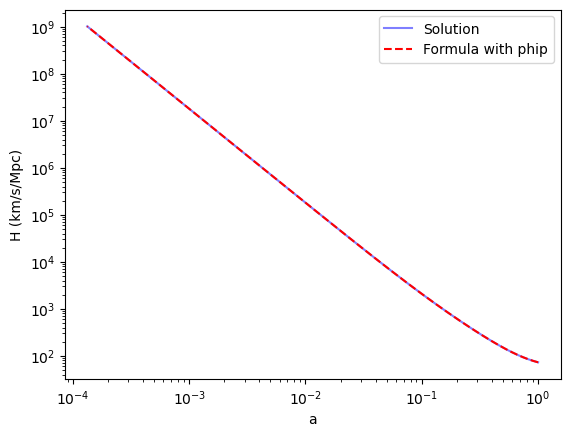

At the end of the simulation, at a=0.00013277129742794724
value of phi : 1063.5015997544435
value of phip : -1063.4725890743603
value of H : 1021365133.4082859 km/s/Mpc
value of rhom : 7.264044087060797e-36
value of rhora : 2.227457352088359e-37


In [303]:
plotBDN(solution,phi0,rhom0ER,rhora0ER,phip0,kappabar,wm,wra,Dn,K,lambd,H0ER,X)

             In General Relativity

 We are going to use Friedmann equation:\
 $HH_{,N}=\frac{\kappa^2}{2}(\rho+p)$\
 and the conservation equation:\
 $\dot{\rho_a}+3H(w_a+1)\rho_a=0$

In [304]:
def systemRGNC(n,Y,kappa,wm,wla,wra,rho0,H0):
            #We define our variables
    H=Y[0]    #Hubble parameter (normalize)
    rhomn=Y[1] #matter density norma
    rhom=rhomn*rho0
    rholan=Y[2]  #Constant cosmo norma
    rhola=rholan*rho0
    rhoran=Y[3]  #radiation norma
    rhora=rhoran*rho0
    
    Hp=-(kappa**2)*(rhom*(1+wm)+rhola*(1+wla)+rhora*(1+wra))/(2*H*(H0**2))
    
    #Conservation equations
    
    rhomp=-3*(1+wm)*rhomn 
    rholap=-3*(1+wla)*rholan 
    rhorap=-3*(1+wra)*rhoran 
    
    return(Hp,rhomp,rholap,rhorap)

        Solve the system of equation

In [305]:
def solveRGNC(H0RG,rhom0,rhola0,rhora0,rho0,kappa,wm,wla,wra,Dn):
    Yci=[H0RG/H0RG,rhom0/rho0,rhola0/rho0,rhora0/rho0]  #initial conditions, normalize
    N=10**(7-enl)                                       #number of points in the solving
    efolds=np.linspace(Dn[0],Dn[1],N)                   #List of points
    solution = solve_ivp(systemRGNC, Dn, Yci, method='Radau', t_eval=efolds, args=(kappa,wm,wla,wra,rho0,H0RG),rtol=6*10**-11)  #Resolution of the set
    print(solution.success)
    return(solution)

        Plot

In [306]:
def plotRGNC(solutionRG,H0RG,rhom0,rhola0,rhora0,rho0,kappa,wm,wla,wra,Dn,X):
    Y=solutionRG.y
    N=solutionRG.t
    A=np.exp(N)
    
    Al=False
    if X=="A":
        Al=True
        
    H=Y[0]*H0RG   #Hubble paramter
    rhom=Y[1]*rho0  #Dust density 
    rhola=Y[2]*rho0  #lambda density 
    rhora=Y[3]*rho0  #radiation density 

    H0RG=np.sqrt(((kappa**2)*(rhom[0]+rhola[0]+rhora[0])/3)+K/(A[0]**2))   #Hubble parameter today
    print("The value of H0 (ob) is "+str(H0/conversions/conversionH0tosm1)+"km/s/Mpc")
    print("The value of H0 (RG) is "+str(H0RG/conversions/conversionH0tosm1)+"km/s/Mpc")
    
    Hp=-(kappa**2)*(rhom*(1+wm)+rhola*(1+wla)+rhora*(1+wra))/(2*H)   #The derivative of Hubble parameter today
    
    rhoc=3*(H**2)/(kappa**2)  #Critical density
    omegam=rhom/rhoc          #Omega dust
    omegara=rhora/rhoc        #Omega radiation
    omegala=rhola/rhoc        #Omega Lambda
    
    if X=="H" or Al:
        plt.plot(A,H/conversions/conversionH0tosm1,alpha=0.5,color="b",label="Solution")
        plt.loglog()
        plt.ylabel("H (km/s/Mpc)")
        plt.xlabel("a")
        plt.legend()
        plt.show()

    if X=="Hp" or Al:
        plt.plot(A,abs(Hp),color="b",alpha=0.5,label="Solution")
        plt.loglog()
        plt.ylabel("Hp (km/s/Mpc)")
        plt.xlabel("a")
        plt.legend()
        plt.show()
        
    if X=="H/H0":
        plt.plot(A,H/H0RG,alpha=0.5,color="b",label="Solution")
        plt.loglog()
        plt.ylabel(r"$\frac{H}{H_0}$")
        plt.xlabel("a")
        plt.legend()
        plt.show()

    if (X=="rhom" or Al) and rhom0!=0:
        plt.plot(A,rhom,alpha=0.5,color="b",label="Solution")
        plt.plot(A,rhoanda(rhom0,A,wm,a0),alpha=0.5,color="r",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_m$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
          
    if (X=="rhora" or Al) and rhora0!=0:
        plt.plot(A,rhora,alpha=0.5,color="b",label="Solution")
        plt.plot(A,rhoanda(rhora0,A,wra,a0),alpha=0.5,color="r",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_r$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
    
    if (X=="rhola" or Al) and rhola0!=0:
        plt.plot(A,rhola,alpha=0.5,color="b",label="Solution")
        plt.plot(A,rhoanda(rhola0,A,wla,a0),alpha=0.5,color="r",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_{\Lambda}$")
        plt.xlabel("a")
        plt.legend()
        plt.show()
    
    if X=="omega":
        plt.plot(A,omegam,color="m",label=r"$\Omega_{RGm}$")
        plt.plot(A,omegara,color="g",label=r"$\Omega_{RGra}$")
        plt.plot(A,omegala,color="y",label=r"$\Omega_{RG\Lambda}$")
        plt.xscale("log")
        plt.ylabel(r"$\Omega$")
        plt.xlabel("a")
        plt.legend()
        plt.show()

In [307]:
# in GR
rhoc0RG=rhoc0                    #Critical density

omegara0=5.44*10**(-5)           #The omega radiation that we mesured
wra=1/3

omegala0=Lambda/(3*H0**2)
wla=-1

omegam0=1-omegala0-omegara0
wm=0
print(omegara0,omegam0,omegala0)

rhom0=rhoc0RG*omegam0
rhola0=rhoc0RG*omegala0
rhora0=rhoc0RG*omegara0

H0RG=np.sqrt(((kappa**2)*(rhom0+rhola0+rhora0)/3))
print(H0RG)
print(omegara0/omegam0)

5.440000000000001e-05 0.40972711010466656 0.5902184898953334
1.5566759238917063e-42
0.00013277129742794732


In [308]:
a0=1                        #today
aeg=2.17*10**(-4)
if omegara0*omegam0!=0 and aeg<a0:
        if aeg>omegara0/omegam0:
            aeg=omegara0/omegam0   # Put the end of the simulation at the beginning of matter era if it exist

n0=np.log(a0)
nfsepa=np.log(aeg)

Dn=[n0,nfsepa]

K=0#-1*conversions**2

print(phi0,phip0,H0,rhom0ER,Dn)
print(K)

1 -0.03482547638863085 1.5566759238917063e-42 1.7001649897471264e-47 [0.0, -8.92688247810792]
0


In [309]:
solutionRG=solveRGNC(H0RG,rhom0,rhola0,rhora0,rhoc0RG,kappa,wm,wla,wra,Dn)
if solutionRG.success ==False :
    print(solution)

True


In [310]:
#plot the variable X="H,Hp,H/H0,rhom,rhora,rholambda" or X="A" for everything (except for H/H0 and omega)
X="H"

The value of H0 (ob) is 73.0km/s/Mpc
The value of H0 (RG) is 73.0km/s/Mpc


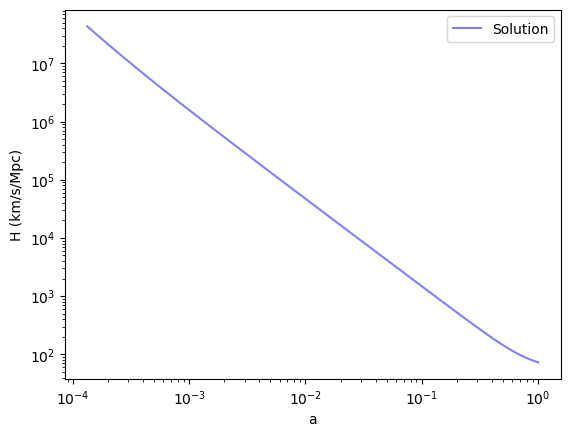

In [311]:
plotRGNC(solutionRG,H0RG,rhom0,rhola0,rhora0,rhoc0RG,kappa,wm,wla,wra,Dn,X)

# Find a minimum value for Hubble tension

Here we choose a value of $H0_{supernovae}= 72.0$ $km/s/Mpc$, and $H0_{cosmo}= 67.9$ $km/s/Mpc$

In [312]:
#Constantes:
G=(6.67428)*10**(-11)*(conversions**2)/((conversionm**3)*conversionkg)    #pm 0.00015.10**-11
kappa=np.sqrt(8*np.pi*G)   #GeV-1
Lambda=1.1056*10**(-52)*(conversionm**2)
if HM=="c":
    H0=67.4*conversionH0tosm1*conversions     #pm 0.5    =[66.9,67.9]  67.4
elif HM=="s":
    H0=72.0*conversionH0tosm1*conversions       #pm 1.0  =[72.0,74.0]  73.0
rhoc0=3*H0**2/(kappa**2)
c=299792458
a0=1

In [313]:
print("Value of H0 supernovae : "+str(H0/conversionH0tosm1/conversions)+" km/s/Mpc")

Value of H0 supernovae : 72.0 km/s/Mpc


Here we determine the position of the CMB (z=1090,H) with the value, $H0_{cosmo}= 67.9$ $km/s/Mpc$.\
Compare to the first version, we calculate the value of $\Omega$.

In [315]:
def HCMBminflat(z):    
    H0cosmo=67.9     #pm 0.5    =[66.9,67.9]  67.4
    rhoc0RG=3*H0cosmo**2/(kappa**2)
    
    Lambda=1.1056*10**(-52)*(conversionm**2)

    omegala0RG=Lambda/(3*H0cosmo**2)
    omegara0RG=5.44*10**(-5)*srhora
    omegam0RG=(omegala0RG-omegala0RG-omegara0RG)
    return(H0cosmo*np.sqrt(((1+z)**4)*omegara0RG+((1+z)**3)*omegam0RG+omegala0RG))

Code to plot differents comparaison

In [328]:
def compaNmin(solutionRG,solutionER,phi0,phip0,rhom0RG,rhom0ER,rhora0RG,rhora0ER,wm,wra,wla,Lambda,lambd,X,Condition):
    a0=1
    
    YRG=solutionRG.y   #[HRG/H0RG,rhom/rho0,rhola/rho0,rhora/rho0]       
    NRG=solutionRG.t   #The number of e-folds in RG simulation
    ARG=np.exp(NRG)    #The scale factor in RG simulation
    
    YER=solutionER.y   #[phi]      
    NER=solutionER.t   #The number of e-folds in ER simulation 
    AER=np.exp(NER)    #The scale factor in ER simulation
    
                            #For GR
    
    H0RG=np.sqrt(kappa**2*(rhom0RG+rhora0RG)/3+Lambda/3)          #Hubble paramater today in GR

    HRG=YRG[0]*H0RG              #Hubble parameter in GR
    rhomRG=YRG[1]*rhoc0RG        #Dust density in GR
    rholaRG=YRG[2]*rhoc0RG       #lambda density in GR
    rhoraRG=YRG[3]*rhoc0RG       #radiation density in GR
    
    HpRG=-(kappa**2)*(rhomRG*(1+wm)+rholaRG*(1+wla)+rhoraRG*(1+wra))/(2*HRG)   #Derivative of Hubble parameter in GR

                            #For ER
        
    phi=YER[0]                               #Scalar field
    
    rhomER=rhom0ER*np.exp(-3*(1+wm)*NER)     #Dust density in ER
    rhoraER=rhora0ER*np.sqrt(phi0/phi)*np.exp(-3*(1+wra)*NER)   #radiation density in ER
    rhopot=lambd*phi**(3/2)/kappabar      #Potential density

    H0ER=np.sqrt((kappabar*(rhom0ER+rhora0ER)/(3*np.sqrt(phi0))+V(phi0,lambd)/(6*phi0))/(1+phip0/phi0))  #Hubble parameter in ER today
        
    B=phip0*H0ER*np.exp(-3*NER)/phi
    C=kappabar*(rhomER+rhoraER)/(3*np.sqrt(phi))+V(phi,lambd)/(6*phi)
    delta=B*B+4*C
    HER=(-B+np.sqrt(delta))/2            #Hubble parameter in ER

    phip=phip0*(H0ER/HER)*np.exp(-3*NER)    #Derivative of the scalar field in respect of number of e-folds
    
    pER=wm*rhomER+wra*rhoraER              # Totale pressure in ER
    HpER=-kappabar*pER/(2*np.sqrt(phi))-3*HER/2+HER*phip/(2*phi)+V(phi,lambd)/(4*HER*phi)   #Derivative of the Hubble parameter in ER
        
    phipp=-3*phip-HpER*phip/HER    #The second derivative of the scalar field
            
    rhocER=3*HER**2*np.sqrt(phi)*(1+phip/phi)/kappabar    #Critical density in ER
    rhocRG=3*HRG**2/(kappa**2)                            #Critical density in GR
    
    omegamER=rhomER/rhocER                            #omega dust in ER
    omegaraER=rhoraER/rhocER                          #omega radiation in ER
    omegapotER=rhopot/rhocER                          #omega potential in ER
    omegamRG=rhomRG/rhocRG                            #omega dust in GR
    omegaraRG=rhoraRG/rhocRG                          #omega radiation in GR
    omegalaRG=rholaRG/rhocRG                          #omega Lambda in GR
    
    print("The value of H0 (ob) is "+str(H0/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (RG) is "+str(H0RG/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (ER) is "+str(H0ER/conversions/conversionH0tosm1)+" km/s/Mpc")
    
    varG=-1/2*phip/phi     #Relative variation of Geff only in ER
    
                    #Limit condition
    
    limat=True
    lim=0
    ilim=0
    
    if Condition==True:
        for i in range(len(rhomER)):
            if rhoraER[i]>=0.1*rhomER[i] and limat==True:    #We are looking for the first time that rhoradiation>0.1rhodust, and get the index
                lim=NER[i]
                ilim=i
                limat=False
                
    
    Al=False
    if X=="A":
        Al=True
        
    if X=="H" or Al:
        plt.plot(AER,HER/conversions/conversionH0tosm1,alpha=0.7,color="b",label="ER case")  
        #plt.plot(ARG,HRG/conversions/conversionH0tosm1,alpha=0.7,color="r",label="GR case")
       # if phip0!=0:   #If the derivative use of the Klein-Gordon solution
        #    plt.plot(AER,atoH(AER,H0ER/conversions/conversionH0tosm1,phip0,phip),"--",alpha=0.5,color="k",label="Formula with phip")
        #If there is only one component
        if rhom0ER+rhora0ER==0 and lambd!=0 :   #Only potential
            plt.plot(AER,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,AER,AER[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0ER+lambd==0 and rhora0ER!=0 :   #Only radiation
            plt.plot(AER,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,AER,AER[0],wra),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0ER==0 and rhom0ER!=0 :   #Only dust
            plt.plot(AER,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,AER,AER[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='c',label="Limit condition")
            
        z=1090   #Redshift at the CMB
        plt.axvline(x=1/(1+z),color="k",label="CMB")   #Scale factor at the CMB
        y=HCMBminflat(z)
        plt.axhline(y,color="k")  #Value of H at the CMB
        print("Position of the CMB, redshift: "+str(z)+" and H : "+str(y)+ " km/s/Mpc")
        
        #plt.xlim(1/(2+z),1/(z))
        #plt.ylim(y-10**5,2*y)
        
        plt.ylabel("H (km/s/Mpc)")
        plt.xlabel("a")
        plt.title("Evolution of H")
        plt.loglog()
        plt.legend()
        plt.show()
    
    if X=="H/H0":
        plt.plot(AER,HER/H0ER,alpha=0.5,color="b",label="ER case")
        plt.plot(ARG,YRG[0],alpha=0.5,color="r",label="GR case")
        if phip0!=0:   #If the derivative use of the Klein-Gordon solution
            plt.plot(AER,atoH(AER,1,phip0,phip),"--",alpha=0.5,color="k",label="Formula with phip")
        #If there is only one components
        if rhom0ER+rhora0ER==0 and lambd!=0 :   #Only potential
            plt.plot(AER,atoHonec(1,phi0,phip0,AER,AER[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0ER+lambd==0 and rhora0ER!=0 :   #Only radiation
            plt.plot(AER,atoHonec(1,phi0,phip0,AER,AER[0],wra),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0ER==0 and rhom0ER!=0 :   #Only dust
            plt.plot(AER,atoHonec(1,phi0,phip0,AER,AER[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        plt.loglog()
        plt.ylabel(r"$\frac{H}{H_0}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\frac{H}{H_0}$")
        plt.legend()
        plt.show()
    
    if X=="Hp" :
        plt.plot(AER,abs(HpER),color="b",alpha=0.5,label="ER case")
        plt.plot(ARG,abs(HpRG),color="r",alpha=0.5,label="RG case")
        plt.loglog()
        if HpER[0]<=0:
            lab=r"$-H_{,N}$"
        else:
            lab=r"$H_{,N}$"
        plt.ylabel(lab+" (km/s/Mpc)")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$H_{,N}$")
        plt.legend()
        plt.show()
        
    if X=="varG" or Al:
        plt.plot(AER,abs(varG),color="b",alpha=0.5,label="Solution")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='k',label="Limit condition")
        plt.loglog()
        if varG[0]<=0:
            ab="-"
        else:
            ab=""
        lab=r"$\frac{G_{eff,N}}{G_{eff}}$"
        plt.title("Variation of "+ab+lab)
        plt.ylabel(ab+lab)
        plt.xlabel("a")
        plt.legend()
        plt.show()

    if X=="rhom" and rhom0ER!=0:
        plt.plot(AER,rhomER,alpha=0.5,color="b",label="ER case")
        plt.plot(AER,rhoanda(rhom0ER,AER,wm,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.plot(ARG,rhomRG,alpha=0.5,color="r",label="RG case")
        plt.plot(ARG,rhoanda(rhom0RG,ARG,wm,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_m$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\rho_{m}$")
        plt.legend()
        plt.show()

    if X=="rhora" and rhora0RG!=0:
        plt.plot(AER,rhoraER,alpha=0.5,color="b",label="ER case")
        plt.plot(AER,rhoanda(rhora0ER,AER,wra,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.plot(ARG,rhoraRG,alpha=0.5,color="r",label="RG case")
        plt.plot(ARG,rhoanda(rhora0RG,ARG,wra,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_{radiation}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\rho_{radiation}$")
        plt.legend()
        plt.show()
        
    if X=="rhola" and rhola0RG!=0:
        plt.plot(ARG,rholaRG,alpha=0.5,color="r",label="RG case")
        plt.plot(AER,rhopot,alpha=0.5,color="b",label="ER case")
        plt.plot(ARG,rhoanda(rhola0RG,ARG,wla,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_{\Lambda}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\rho_{\Lambda}$")
        plt.legend()
        plt.show()
          
    if X=="phi" or Al:
        plt.plot(AER,phi,alpha=0.5,color="b",label="Solution")
        if rhom0ER+rhora0ER==0 and lambd!=0 :
            plt.plot(AER,atophionec(phi0,phip0,AER,AER[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0ER+lambd==0 and rhora0ER!=0 :
            plt.plot(AER,atophionec(phi0,phip0,AER,AER[0],wra),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0ER==0 and rhom0ER!=0 :
            plt.plot(AER,atophionec(phi0,phip0,AER,AER[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        plt.loglog()
        plt.ylabel(r"$\phi$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\phi$")
        plt.legend()
        plt.show()
       
    if X=="phip/phi" :
        plt.plot(AER,phip/phi,color="b",alpha=0.5,label="Solution")
        if phip0>0:
            plt.loglog()
        plt.xscale("log")
        plt.ylabel(r"$\frac{\phi,_N}{\phi}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\phi_{,N}$")
        plt.legend()
        plt.show()
        
    if X=="phip" :
        plt.plot(AER,phip,color="b",alpha=0.5,label="Solution")
        plt.plot(AER,atophip(AER,phip0,a0,H0ER,HER),alpha=0.5,color="r",label="Analytical solution")
        if phip0>0:
            plt.loglog()
        plt.xscale("log")
        plt.ylabel(r"$\phi,_N$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\phi_{,N}$")
        plt.legend()
        plt.show()

    if phip0!=0 and X=='phipp':
        if phip0!=0:
            plt.plot(AER,(phipp/phip),alpha=0.5,color="b",label="Solution")
            plt.plot(AER,-(3/2+phip/(2*phi)),alpha=0.5,color="r")
            plt.title("Evolution of "+r"$\frac{\phi_{,NN}}{\phi_{,N}}$")
            plt.xscale("log")
            plt.ylabel(r"$\frac{\phi_{,NN}}{\phi_{,N}}$")
            plt.show()
        else:
            print("phip0=0")
    
    if X=="omega":
        plt.plot(AER,omegamER,color="k",label=r"$\Omega_{ERm}$")
        plt.plot(AER,omegaraER,color="r",label=r"$\Omega_{ERra}$")
        plt.plot(AER,omegapotER,color="c",label=r"$\Omega_{ER\lambda}$")
        plt.plot(ARG,omegamRG,":",color="y",label=r"$\Omega_{RGm}$")
        plt.plot(ARG,omegaraRG,":",color="g",label=r"$\Omega_{RGra}$")
        plt.plot(ARG,omegalaRG,":",color="m",label=r"$\Omega_{RG\Lambda}$")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='k',label="Limit condition")
        plt.xscale("log")
        plt.ylabel(r"$\Omega$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\Omega$")
        plt.legend()
        plt.show()
        
    if limat==False:
        print("At the condtion, at a="+str(np.exp(NER[ilim])))
        print("value of phi : "+str(phi[ilim]))
        print("value of phip : "+str(phip[ilim]))
        print("value of H (ER): "+str(HER[ilim]/conversions/conversionH0tosm1)+" km/s/Mpc")
        print("value of H (RG): "+str(HRG[ilim]/conversions/conversionH0tosm1)+" km/s/Mpc")

        print("value of max(omegamER) : "+str(max(omegamER)))
        print("value of max(omegaraER) : "+str(max(omegaraER)))
        print("value of max(omegapotER) : "+str(max(omegapotER)))

        print("value of max(omegamRG) : "+str(max(omegamRG)))
        print("value of max(omegaraRG) : "+str(max(omegaraRG)))
        print("value of max(omegalaRG) : "+str(max(omegalaRG)))



        print("value of rhomER : "+str(rhomER[ilim]))
        print("value of rhoraER : "+str(rhoraER[ilim]))
        print("value of rhopot : "+str(rhopot[ilim]))
        print("value of rhomRG : "+str(rhomRG[ilim]))
        print("value of rhoraRG : "+str(rhoraRG[ilim]))
        print("value of rholaRG : "+str(rholaRG[ilim]))

    else:
        print("At the end of the simulation, at a="+str(np.exp(NER[-1])))
        print("value of phi : "+str(phi[-1]))
        print("value of phip : "+str(phip[-1]))
        print("value of H (ER): "+str(HER[-1]/conversions/conversionH0tosm1)+" km/s/Mpc")
        print("value of H (RG): "+str(HRG[-1]/conversions/conversionH0tosm1)+" km/s/Mpc")

        print("value of max(omegamER) : "+str(max(omegamER)))
        print("value of max(omegaraER) : "+str(max(omegaraER)))
        print("value of max(omegapotER) : "+str(max(omegapotER)))

        print("value of max(omegamRG) : "+str(max(omegamRG)))
        print("value of max(omegaraRG) : "+str(max(omegaraRG)))
        print("value of max(omegalaRG) : "+str(max(omegalaRG)))



        print("value of rhomER : "+str(rhomER[-1]))
        print("value of rhoraER : "+str(rhoraER[-1]))
        print("value of rhopot : "+str(rhopot[-1]))
        print("value of rhomRG : "+str(rhomRG[-1]))
        print("value of rhoraRG : "+str(rhoraRG[-1]))
        print("value of rholaRG : "+str(rholaRG[-1]))

In [317]:
def initcondcomp(PHI0,PHIP0,H0,Lambda,srhom,srhora,slambda,rhoc0,aeg,k):
    phi0=PHI0
    phip0=phi0*PHIP0/H0*conversionGeVm1toyr    #We use the constraint gives by lunar Laser Engine
    cons=1+phip0/phi0
    
    kappabar=(kappa**2)*np.sqrt(phi0)
    Lambda=1.1056*10**(-52)*(conversionm**2)
    if srhom==0 and srhora==0:
        lambd=3*(H0**2)*cons/phi0 
        Lambda=3*(H0**2)
    else:
        lambd=Lambda*cons/phi0
        
    if slambda==0:
        Lambda=0
        lambd=0

    print("value of Lambda : "+str(Lambda))
    # in GR
    rhoc0RG=3*H0**2/(kappa**2)
            
    omegaK0RG=float(0)
    K=k*omegaK0RG*H0**2
    omegatotRG=float(1-omegaK0RG)
    print("omegatotRG : "+str(omegatotRG))

    omegala0RG=Lambda/(3*H0**2)
    wla=-1
    
    if lambd+srhom==0:
        omegara0RG=omegatotRG
    if srhom==0:
        omegara0RG=omegatotRG-omegala0RG
    else:
        omegara0RG=5.44*10**(-5)*srhora
    wra=1/3
    
    omegam0RG=(omegatotRG-omegala0RG-omegara0RG)
    wm=0

    rhom0RG=rhoc0RG*omegam0RG*srhom
    rhora0RG=rhoc0RG*omegara0RG*srhora
    rhola0RG=rhoc0RG*omegala0RG
    
    print("value of rhoc0ER : "+str(rhoc0RG))
    
    print("value of rhom0RG : "+str(rhom0RG))
    print("value of rhora0RG : "+str(rhora0RG))
    print("value of rhola0RG : "+str(rhola0RG))
    
    print("omegam0RG : "+str(omegam0RG))
    print("omegara0RG : "+str(omegara0RG))
    print("omegala0RG : "+str(omegala0RG))
    
    print("omegatot0RG : "+str(omegam0RG+omegala0RG+omegara0RG))
    print("omegatot0RG2 : "+str((rhom0RG+rhola0RG+rhora0RG)/rhoc0RG))
    print((rhom0RG+rhola0RG+rhora0RG)/rhoc0RG)
    
    # in ER
    rhoc0ER=rhoc0RG*cons
    rhom0ER=rhom0RG*cons*srhom
    rhora0ER=rhora0RG*cons*srhora
    rhola0ER=lambd*phi0**(3/2)/kappabar

    omegam0ER=rhom0ER/rhoc0ER
    omegara0ER=rhora0ER/rhoc0ER
    omegala0ER=rhola0ER/rhoc0ER
        
    print("omegam0ER : "+str(omegam0ER))
    print("omegara0ER : "+str(omegara0ER))
    print("omegala0ER : "+str(omegala0ER))
    
    print("dif omegam0 : "+str(omegam0ER-omegam0RG))
    print("omegatot0ER : "+str(omegara0ER+omegam0ER+omegala0ER))
    print("omegatot0ER2 : "+str((rhom0ER+rhola0ER+rhora0ER)/rhoc0ER))
    print("omegatot0ER2==omegatot0RG2 : "+str((rhom0ER+rhola0ER+rhora0ER)/rhoc0ER==(rhom0RG+rhola0RG+rhora0RG)/rhoc0RG))
    
    H0RG=np.sqrt(kappa**2*(rhom0RG+rhora0RG)/3+Lambda/3)   
    H0ER=np.sqrt((kappabar*(rhom0ER+rhora0ER)/(3*np.sqrt(phi0))+V(phi0,lambd)/(6*phi0))/(cons))
    print("The value of H0 (ob) is "+str(H0/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (RG) is "+str(H0RG/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (ER) is "+str(H0ER/conversions/conversionH0tosm1)+" km/s/Mpc")
    
    a0=1                      #today

    if omegara0ER*omegam0ER!=0 :
        if aeg>omegara0ER/omegam0ER and aeg<=1:
            aeg=omegara0ER/omegam0ER

    n0=np.log(a0)             #E-folds corresponding to the conditions
    nfsepa=np.log(aeg)

    Dn=[n0,nfsepa]
    print("value of phi0 : "+str(phi0))
    print("value of phip0 : "+str(phip0))
    print("value of H0ER : "+str(H0ER/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("value of rhom0ER : "+str(rhom0ER))
    print("value of rhora0ER : "+str(rhora0ER))
    print("value of wm : "+str(wm))
    print("value of wra : "+str(wra))
    print("value of Dn : "+str(Dn))
    print("value of Da : "+str(np.exp(Dn)))
    print("value of kappabar : "+str(kappabar))
    print("value of lambda : "+str(lambd))
    print("value of K : "+str(K))

    return(phi0,phip0,H0ER,H0RG,rhoc0ER,rhoc0RG,rhom0RG,rhora0RG,rhola0RG,rhom0ER,rhora0ER,wm,wra,wla,Dn,kappabar,Lambda,lambd,K)

In [355]:
PHI0=1
#PHIP0=1.37*10**(-15)
PHIP0=13*10**(-16)


slambda=float(1)    #If lambda==0 => slambda=0 otherwise =1
srhom=float(1)      #If rhom==0 => srhom=0 otherwise =1
srhora=float(1)     #If rhora==0 => srhora=0 otherwise =1

aeg=2.17*10**(-2)

k=0        #Curvature                    

In [356]:
(phi0,phip0,H0ER,H0RG,rhoc0ER,rhoc0RG,rhom0RG,rhora0RG,rhola0RG,rhom0ER,rhora0ER,wm,wra,wla,Dn,kappabar,Lambda,lambd,K)=initcondcomp(PHI0,PHIP0,H0,Lambda,srhom,srhora,slambda,rhoc0,aeg,k)

value of Lambda : 4.290723039999999e-84
omegatotRG : 1.0
value of rhoc0ER : 4.182342078431112e-47
value of rhom0RG : 1.6445734344732863e-47
value of rhora0RG : 2.2751940906665255e-51
value of rhola0RG : 2.5375411245487593e-47
omegam0RG : 0.39321829817665266
omegara0RG : 5.440000000000001e-05
omegala0RG : 0.6067273018233473
omegatot0RG : 1.0
omegatot0RG2 : 1.0000000000000002
1.0000000000000002
omegam0ER : 0.39321829817665266
omegara0ER : 5.440000000000001e-05
omegala0ER : 0.6067273018233473
dif omegam0 : 0.0
omegatot0ER : 1.0
omegatot0ER2 : 1.0
omegatot0ER2==omegatot0RG2 : False
The value of H0 (ob) is 72.0 km/s/Mpc
The value of H0 (RG) is 72.0 km/s/Mpc
The value of H0 (ER) is 71.99999999999999 km/s/Mpc
value of phi0 : 1
value of phip0 : 1.7654581780347585e-05
value of H0ER : 71.99999999999999 km/s/Mpc
value of rhom0ER : 1.6446024687294788e-47
value of rhora0ER : 2.275234258266665e-51
value of wm : 0
value of wra : 0.3333333333333333
value of Dn : [0.0, -8.885756048873665]
value of Da :

        Solve in GR and in ER case

In [357]:
solutionRG=solveRGNC(H0RG,rhom0RG,rhola0RG,rhora0RG,rhoc0RG,kappa,wm,wla,wra,Dn)
solutionER=solveBDN(phi0,H0ER,rhom0ER,rhora0ER,phip0,kappabar,wm,wra,Dn,K,lambd)

True


/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:7: RuntimeWarning: overflow encountered in exp
  rhom=rhom0*np.exp(xm)          #Dust density
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:8: RuntimeWarning: overflow encountered in exp
  rhora=rhora0*np.sqrt(phi0/phi)*np.exp(xra)   #radiation density
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:10: RuntimeWarning: overflow encountered in exp
  B=phip0*H0*np.exp(-3*n)/phi
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:13: RuntimeWarning: invalid value encountered in scalar add
  H=(-B+np.sqrt(delta))/2
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:15: RuntimeWarning: overflow encountered in exp
  phip=phip0*(H0/H)*np.exp(-3*n)
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:8: RuntimeWarning: invalid value encountered in sqrt
  rhora=rhora0*np.sqrt(phi0

  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00 -8.886e-07 ... -7.049e+00 -7.049e+00]
        y: [[ 1.000e+00  1.000e+00 ...  6.808e-06  1.241e-07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 950
     njev: 25
      nlu: 234


        What do you want to plot

In [358]:
#plot the variable X="H,varG,phi,omega" or X="A" for H,varG,phi
X="H"
C=False   #If you want the condition with the density

    plot and values

The value of H0 (ob) is 72.0 km/s/Mpc
The value of H0 (RG) is 72.0 km/s/Mpc
The value of H0 (ER) is 71.99999999999999 km/s/Mpc
Position of the CMB, redshift: 1090 and H : 595826.2036298389 km/s/Mpc


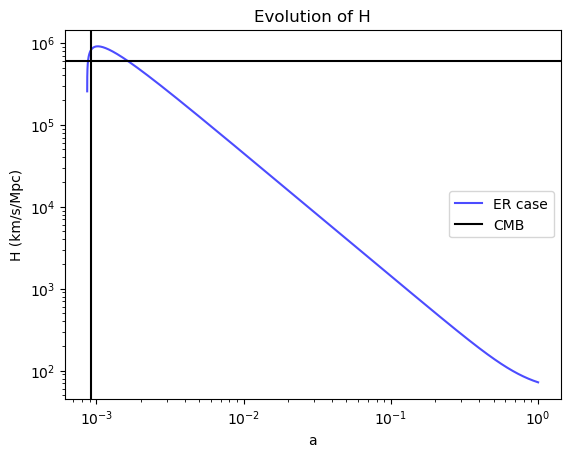

At the end of the simulation, at a=0.0008679297745395442
value of phi : 1.2413973905522708e-07
value of phip : 7.588924293742309
value of H (ER): 256186.327771465 km/s/Mpc
value of H (RG): 39238878.88401342 km/s/Mpc
value of max(omegamER) : 0.9975114248002301
value of max(omegaraER) : 0.9977944560096758
value of max(omegapotER) : 0.6067273018233474
value of max(omegamRG) : 0.9975114245733885
value of max(omegaraRG) : 0.5000000115586247
value of max(omegalaRG) : 0.6067273018233473
value of rhomER : 2.5154006931044893e-38
value of rhoraER : 1.137974041483038e-35
value of rhopot : 1.10990804366436e-57
value of rhomRG : 6.210945717728434e-36
value of rhoraRG : 6.21094600491378e-36
value of rholaRG : 2.5375411245487593e-47


In [359]:
compaNmin(solutionRG,solutionER,phi0,phip0,rhom0RG,rhom0ER,rhora0RG,rhora0ER,wm,wra,wla,Lambda,lambd,X,C)

# Find a maximum value for the Hubble tension

Here we choose a value of $H0_{supernovae}= 74.0$ $km/s/Mpc$, and $H0_{cosmo}= 66.9$ $km/s/Mpc$

In [360]:
def HCMBmaxflat(z):    
    H0cosmo=66.9     #67.4 pm 0.5    =[66.9,67.9] 
    
    Lambda=1.1056*10**(-52)*(conversionm**2)

    omegala0RG=Lambda/(3*H0cosmo**2)
    omegara0RG=5.44*10**(-5)
    omegam0RG=(omegala0RG-omegala0RG-omegara0RG)
    return(H0cosmo*np.sqrt(((1+z)**4)*omegara0RG+((1+z)**3)*omegam0RG+omegala0RG))

In [368]:
def compaN(solutionRG,solutionER,phi0,phip0,rhom0RG,rhom0ER,rhora0RG,rhora0ER,wm,wra,wla,Lambda,lambd,X,Condition):
    a0=1
    
    YRG=solutionRG.y   #[HRG/H0RG,rhom/rho0,rhola/rho0,rhora/rho0]       
    NRG=solutionRG.t   #The number of e-folds in RG simulation
    ARG=np.exp(NRG)    #The scale factor in RG simulation
    
    YER=solutionER.y   #[phi]      
    NER=solutionER.t   #The number of e-folds in ER simulation 
    AER=np.exp(NER)    #The scale factor in ER simulation
    
                            #For GR
    
    H0RG=np.sqrt(kappa**2*(rhom0RG+rhora0RG)/3+Lambda/3)          #Hubble paramater today in GR

    HRG=YRG[0]*H0RG              #Hubble parameter in GR
    rhomRG=YRG[1]*rhoc0RG        #Dust density in GR
    rholaRG=YRG[2]*rhoc0RG       #lambda density in GR
    rhoraRG=YRG[3]*rhoc0RG       #radiation density in GR
    
    HpRG=-(kappa**2)*(rhomRG*(1+wm)+rholaRG*(1+wla)+rhoraRG*(1+wra))/(2*HRG)   #Derivative of Hubble parameter in GR

                            #For ER
        
    phi=YER[0]                               #Scalar field
    
    rhomER=rhom0ER*np.exp(-3*(1+wm)*NER)     #Dust density in ER
    rhoraER=rhora0ER*np.sqrt(phi0/phi)*np.exp(-3*(1+wra)*NER)   #radiation density in ER
    rhopot=lambd*phi**(3/2)/kappabar      #Potential density

    H0ER=np.sqrt((kappabar*(rhom0ER+rhora0ER)/(3*np.sqrt(phi0))+V(phi0,lambd)/(6*phi0))/(1+phip0/phi0))  #Hubble parameter in ER today
        
    B=phip0*H0ER*np.exp(-3*NER)/phi
    C=kappabar*(rhomER+rhoraER)/(3*np.sqrt(phi))+V(phi,lambd)/(6*phi)
    delta=B*B+4*C
    HER=(-B+np.sqrt(delta))/2            #Hubble parameter in ER

    phip=phip0*(H0ER/HER)*np.exp(-3*NER)    #Derivative of the scalar field in respect of number of e-folds
    
    pER=wm*rhomER+wra*rhoraER              # Totale pressure in ER
    HpER=-kappabar*pER/(2*np.sqrt(phi))-3*HER/2+HER*phip/(2*phi)+V(phi,lambd)/(4*HER*phi)   #Derivative of the Hubble parameter in ER
        
    phipp=-3*phip-HpER*phip/HER    #The second derivative of the scalar field
            
    rhocER=3*HER**2*np.sqrt(phi)*(1+phip/phi)/kappabar    #Critical density in ER
    rhocRG=3*HRG**2/(kappa**2)                            #Critical density in GR
    
    omegamER=rhomER/rhocER                            #omega dust in ER
    omegaraER=rhoraER/rhocER                          #omega radiation in ER
    omegapotER=rhopot/rhocER                          #omega potential in ER
    omegamRG=rhomRG/rhocRG                            #omega dust in GR
    omegaraRG=rhoraRG/rhocRG                          #omega radiation in GR
    omegalaRG=rholaRG/rhocRG                          #omega Lambda in GR
    
    print("The value of H0 (ob) is "+str(H0/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (RG) is "+str(H0RG/conversions/conversionH0tosm1)+" km/s/Mpc")
    print("The value of H0 (ER) is "+str(H0ER/conversions/conversionH0tosm1)+" km/s/Mpc")
    
    varG=-1/2*phip/phi     #Relative variation of Geff only in ER
    
                    #Limit condition
    
    limat=True
    lim=0
    ilim=0
    
    if Condition==True:
        for i in range(len(rhomER)):
            if rhoraER[i]>=0.1*rhomER[i] and limat==True:    #We are looking for the first time that rhoradiation>0.1rhodust, and get the index
                lim=NER[i]
                ilim=i
                limat=False
                
    
    Al=False
    if X=="A":
        Al=True
        
    if X=="H" or Al:
        plt.plot(AER,HER/conversions/conversionH0tosm1,alpha=0.7,color="b",label="ER case")  
        #plt.plot(ARG,HRG/conversions/conversionH0tosm1,alpha=0.7,color="r",label="GR case")
       # if phip0!=0:   #If the derivative use of the Klein-Gordon solution
        #    plt.plot(AER,atoH(AER,H0ER/conversions/conversionH0tosm1,phip0,phip),"--",alpha=0.5,color="k",label="Formula with phip")
        #If there is only one component
        if rhom0ER+rhora0ER==0 and lambd!=0 :   #Only potential
            plt.plot(AER,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,AER,AER[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0ER+lambd==0 and rhora0ER!=0 :   #Only radiation
            plt.plot(AER,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,AER,AER[0],wra),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0ER==0 and rhom0ER!=0 :   #Only dust
            plt.plot(AER,atoHonec(H0ER/conversions/conversionH0tosm1,phi0,phip0,AER,AER[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='c',label="Limit condition")
            
        z=1090   #Redshift at the CMB
        plt.axvline(x=1/(1+z),color="k",label="CMB")   #Scale factor at the CMB
        y=HCMBmaxflat(z)
        plt.axhline(y,color="k")  #Value of H at the CMB
        print("Position of the CMB, redshift: "+str(z)+" and H : "+str(y)+ " km/s/Mpc")
        
        #plt.xlim(1/(2+z),1/(z))
        #plt.ylim(y-10**5,y+10**5)
        
        plt.ylabel("H (km/s/Mpc)")
        plt.xlabel("a")
        plt.title("Evolution of H")
        plt.loglog()
        plt.legend()
        plt.show()
    
    if X=="H/H0":
        plt.plot(AER,HER/H0ER,alpha=0.5,color="b",label="ER case")
        plt.plot(ARG,YRG[0],alpha=0.5,color="r",label="GR case")
        if phip0!=0:   #If the derivative use of the Klein-Gordon solution
            plt.plot(AER,atoH(AER,1,phip0,phip),"--",alpha=0.5,color="k",label="Formula with phip")
        #If there is only one components
        if rhom0ER+rhora0ER==0 and lambd!=0 :   #Only potential
            plt.plot(AER,atoHonec(1,phi0,phip0,AER,AER[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0ER+lambd==0 and rhora0ER!=0 :   #Only radiation
            plt.plot(AER,atoHonec(1,phi0,phip0,AER,AER[0],wra),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0ER==0 and rhom0ER!=0 :   #Only dust
            plt.plot(AER,atoHonec(1,phi0,phip0,AER,AER[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        plt.loglog()
        plt.ylabel(r"$\frac{H}{H_0}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\frac{H}{H_0}$")
        plt.legend()
        plt.show()
    
    if X=="Hp" :
        plt.plot(AER,abs(HpER),color="b",alpha=0.5,label="ER case")
        plt.plot(ARG,abs(HpRG),color="r",alpha=0.5,label="RG case")
        plt.loglog()
        if HpER[0]<=0:
            lab=r"$-H_{,N}$"
        else:
            lab=r"$H_{,N}$"
        plt.ylabel(lab+" (km/s/Mpc)")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$H_{,N}$")
        plt.legend()
        plt.show()
        
    if X=="varG" or Al:
        plt.plot(AER,abs(varG),color="b",alpha=0.5,label="Solution")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='k',label="Limit condition")
        plt.loglog()
        if varG[0]<=0:
            ab="-"
        else:
            ab=""
        lab=r"$\frac{G_{eff,N}}{G_{eff}}$"
        plt.title("Variation of "+ab+lab)
        plt.ylabel(ab+lab)
        plt.xlabel("a")
        plt.legend()
        plt.show()

    if X=="rhom" and rhom0ER!=0:
        plt.plot(AER,rhomER,alpha=0.5,color="b",label="ER case")
        plt.plot(AER,rhoanda(rhom0ER,AER,wm,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.plot(ARG,rhomRG,alpha=0.5,color="r",label="RG case")
        plt.plot(ARG,rhoanda(rhom0RG,ARG,wm,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_m$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\rho_{m}$")
        plt.legend()
        plt.show()

    if X=="rhora" and rhora0RG!=0:
        plt.plot(AER,rhoraER,alpha=0.5,color="b",label="ER case")
        plt.plot(AER,rhoanda(rhora0ER,AER,wra,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.plot(ARG,rhoraRG,alpha=0.5,color="r",label="RG case")
        plt.plot(ARG,rhoanda(rhora0RG,ARG,wra,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_{radiation}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\rho_{radiation}$")
        plt.legend()
        plt.show()
        
    if X=="rhola" and rhola0RG!=0:
        plt.plot(ARG,rholaRG,alpha=0.5,color="r",label="RG case")
        plt.plot(AER,rhopot,alpha=0.5,color="b",label="ER case")
        plt.plot(ARG,rhoanda(rhola0RG,ARG,wla,a0),alpha=0.5,color="c",label="Analytical solution")
        plt.loglog()
        plt.ylabel(r"$\rho_{\Lambda}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\rho_{\Lambda}$")
        plt.legend()
        plt.show()
          
    if X=="phi" or Al:
        plt.plot(AER,phi,alpha=0.5,color="b",label="Solution")
        if rhom0ER+rhora0ER==0 and lambd!=0 :
            plt.plot(AER,atophionec(phi0,phip0,AER,AER[0],-1),alpha=0.5,color="c",label=r"$\rho=0$")
        if rhom0ER+lambd==0 and rhora0ER!=0 :
            plt.plot(AER,atophionec(phi0,phip0,AER,AER[0],wra),alpha=0.5,color="c",label=r"$\rho_{ra} \ne 0$")
        if lambd+rhora0ER==0 and rhom0ER!=0 :
            plt.plot(AER,atophionec(phi0,phip0,AER,AER[0],wm),alpha=0.5,color="c",label=r"$\rho_m \ne 0$")
        plt.loglog()
        plt.ylabel(r"$\phi$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\phi$")
        plt.legend()
        plt.show()
       
    if X=="phip/phi" :
        plt.plot(AER,phip/phi,color="b",alpha=0.5,label="Solution")
        if phip0>0:
            plt.loglog()
        plt.xscale("log")
        plt.ylabel(r"$\frac{\phi,_N}{\phi}$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\phi_{,N}$")
        plt.legend()
        plt.show()
        
    if X=="phip" :
        plt.plot(AER,phip,color="b",alpha=0.5,label="Solution")
        plt.plot(AER,atophip(AER,phip0,a0,H0ER,HER),alpha=0.5,color="r",label="Analytical solution")
        if phip0>0:
            plt.loglog()
        plt.xscale("log")
        plt.ylabel(r"$\phi,_N$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\phi_{,N}$")
        plt.legend()
        plt.show()

    if phip0!=0 and X=='phipp':
        if phip0!=0:
            plt.plot(AER,(phipp/phip),alpha=0.5,color="b",label="Solution")
            plt.plot(AER,-(3/2+phip/(2*phi)),alpha=0.5,color="r")
            plt.title("Evolution of "+r"$\frac{\phi_{,NN}}{\phi_{,N}}$")
            plt.xscale("log")
            plt.ylabel(r"$\frac{\phi_{,NN}}{\phi_{,N}}$")
            plt.show()
        else:
            print("phip0=0")
    
    if X=="omega":
        plt.plot(AER,omegamER,color="k",label=r"$\Omega_{ERm}$")
        plt.plot(AER,omegaraER,color="r",label=r"$\Omega_{ERra}$")
        plt.plot(AER,omegapotER,color="c",label=r"$\Omega_{ER\lambda}$")
        plt.plot(ARG,omegamRG,":",color="y",label=r"$\Omega_{RGm}$")
        plt.plot(ARG,omegaraRG,":",color="g",label=r"$\Omega_{RGra}$")
        plt.plot(ARG,omegalaRG,":",color="m",label=r"$\Omega_{RG\Lambda}$")
        if limat==False:
            plt.axvline(x=np.exp(lim), color='k',label="Limit condition")
        plt.xscale("log")
        plt.ylabel(r"$\Omega$")
        plt.xlabel("a")
        plt.title("Evolution of "+r"$\Omega$")
        plt.legend()
        plt.show()
        
    if limat==False:
        print("At the condtion, at a="+str(np.exp(NER[ilim])))
        print("value of phi : "+str(phi[ilim]))
        print("value of phip : "+str(phip[ilim]))
        print("value of H (ER): "+str(HER[ilim]/conversions/conversionH0tosm1)+" km/s/Mpc")
        print("value of H (RG): "+str(HRG[ilim]/conversions/conversionH0tosm1)+" km/s/Mpc")

        print("value of max(omegamER) : "+str(max(omegamER)))
        print("value of max(omegaraER) : "+str(max(omegaraER)))
        print("value of max(omegapotER) : "+str(max(omegapotER)))

        print("value of max(omegamRG) : "+str(max(omegamRG)))
        print("value of max(omegaraRG) : "+str(max(omegaraRG)))
        print("value of max(omegalaRG) : "+str(max(omegalaRG)))



        print("value of rhomER : "+str(rhomER[ilim]))
        print("value of rhoraER : "+str(rhoraER[ilim]))
        print("value of rhopot : "+str(rhopot[ilim]))
        print("value of rhomRG : "+str(rhomRG[ilim]))
        print("value of rhoraRG : "+str(rhoraRG[ilim]))
        print("value of rholaRG : "+str(rholaRG[ilim]))

    else:
        print("At the end of the simulation, at a="+str(np.exp(NER[-1])))
        print("value of phi : "+str(phi[-1]))
        print("value of phip : "+str(phip[-1]))
        print("value of H (ER): "+str(HER[-1]/conversions/conversionH0tosm1)+" km/s/Mpc")
        print("value of H (RG): "+str(HRG[-1]/conversions/conversionH0tosm1)+" km/s/Mpc")

        print("value of max(omegamER) : "+str(max(omegamER)))
        print("value of max(omegaraER) : "+str(max(omegaraER)))
        print("value of max(omegapotER) : "+str(max(omegapotER)))

        print("value of max(omegamRG) : "+str(max(omegamRG)))
        print("value of max(omegaraRG) : "+str(max(omegaraRG)))
        print("value of max(omegalaRG) : "+str(max(omegalaRG)))



        print("value of rhomER : "+str(rhomER[-1]))
        print("value of rhoraER : "+str(rhoraER[-1]))
        print("value of rhopot : "+str(rhopot[-1]))
        print("value of rhomRG : "+str(rhomRG[-1]))
        print("value of rhoraRG : "+str(rhoraRG[-1]))
        print("value of rholaRG : "+str(rholaRG[-1]))

In [381]:
PHI0=1
PHIP0=15*10**(-16)

slambda=float(1)    #If lambda==0 => slambda=0 otherwise =1
srhom=float(1)      #If rhom==0 => srhom=0 otherwise =1
srhora=float(1)     #If rhora==0 => srhora=0 otherwise =1

aeg=2.17*10**(-2)

k=0        #Curvature                    

In [382]:
H0=74.0*conversionH0tosm1*conversions       #73.0 pm 1.0  =[72.0,74.0] 
rhoc0=3*H0**2/(kappa**2)

In [383]:
(phi0,phip0,H0ER,H0RG,rhoc0ER,rhoc0RG,rhom0RG,rhora0RG,rhola0RG,rhom0ER,rhora0ER,wm,wra,wla,Dn,kappabar,Lambda,lambd,K)=initcondcomp(PHI0,PHIP0,H0,Lambda,srhom,srhora,slambda,rhoc0,aeg,k)

value of Lambda : 4.290723039999999e-84
omegatotRG : 1.0
value of rhoc0ER : 4.4179215319229875e-47
value of rhom0RG : 1.8801400724428922e-47
value of rhora0RG : 2.4033493133661054e-51
value of rhola0RG : 2.537541124548759e-47
omegam0RG : 0.42557117840536296
omegara0RG : 5.440000000000001e-05
omegala0RG : 0.574374421594637
omegatot0RG : 1.0
omegatot0RG2 : 1.0
1.0
omegam0ER : 0.42557117840536296
omegara0ER : 5.440000000000001e-05
omegala0ER : 0.574374421594637
dif omegam0 : 0.0
omegatot0ER : 1.0
omegatot0ER2 : 1.0
omegatot0ER2==omegatot0RG2 : True
The value of H0 (ob) is 74.0 km/s/Mpc
The value of H0 (RG) is 74.0 km/s/Mpc
The value of H0 (ER) is 74.0 km/s/Mpc
value of phi0 : 1
value of phip0 : 1.982011260163762e-05
value of H0ER : 74.0 km/s/Mpc
value of rhom0ER : 1.880177337030835e-47
value of rhora0ER : 2.4033969480201174e-51
value of wm : 0
value of wra : 0.3333333333333333
value of Dn : [0.0, -8.964823340942367]
value of Da : [1.00000000e+00 1.27828205e-04]
value of kappabar : 1.69089

In [384]:
solutionRG=solveRGNC(H0RG,rhom0RG,rhola0RG,rhora0RG,rhoc0RG,kappa,wm,wla,wra,Dn)
solutionER=solveBDN(phi0,H0ER,rhom0ER,rhora0ER,phip0,kappabar,wm,wra,Dn,K,lambd)

True


/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:7: RuntimeWarning: overflow encountered in exp
  rhom=rhom0*np.exp(xm)          #Dust density
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:8: RuntimeWarning: overflow encountered in exp
  rhora=rhora0*np.sqrt(phi0/phi)*np.exp(xra)   #radiation density
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:10: RuntimeWarning: overflow encountered in exp
  B=phip0*H0*np.exp(-3*n)/phi
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:13: RuntimeWarning: invalid value encountered in scalar add
  H=(-B+np.sqrt(delta))/2
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:15: RuntimeWarning: overflow encountered in exp
  phip=phip0*(H0/H)*np.exp(-3*n)


  message: Required step size is less than spacing between numbers.
  success: False
   status: -1
        t: [ 0.000e+00 -8.965e-07 ... -6.991e+00 -6.991e+00]
        y: [[ 1.000e+00  1.000e+00 ...  1.044e-05  2.932e-06]]
      sol: None
 t_events: None
 y_events: None
     nfev: 935
     njev: 24
      nlu: 222


/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:8: RuntimeWarning: invalid value encountered in sqrt
  rhora=rhora0*np.sqrt(phi0/phi)*np.exp(xra)   #radiation density
/var/folders/qb/bbf440cx1h1fk83td8h68g0m0000gn/T/ipykernel_11584/725880599.py:11: RuntimeWarning: invalid value encountered in sqrt
  C=kappabar*(rhom+rhora)/(3*np.sqrt(phi))+V(phi,lambd)/(6*phi)


In [385]:
#plot the variable X="H,varG,phi,omega" or X="A" for H,varG,phi
X="H"
C=False   #If you want the condition with the density

The value of H0 (ob) is 74.0 km/s/Mpc
The value of H0 (RG) is 74.0 km/s/Mpc
The value of H0 (ER) is 74.0 km/s/Mpc
Position of the CMB, redshift: 1090 and H : 587051.1490844804 km/s/Mpc


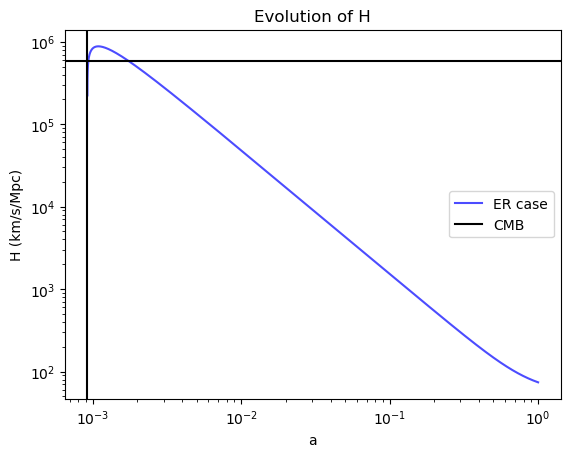

At the end of the simulation, at a=0.000919930985791732
value of phi : 2.931908839008772e-06
value of phip : 8.428987967768943
value of H (ER): 223509.84702454563 km/s/Mpc
value of H (RG): 47238140.14688407 km/s/Mpc
value of max(omegamER) : 0.9977313973808482
value of max(omegaraER) : 0.9878273582517498
value of max(omegapotER) : 0.574374421594637
value of max(omegamRG) : 0.997731397285826
value of max(omegaraRG) : 0.5000000104248955
value of max(omegalaRG) : 0.574374421594637
value of rhomER : 2.4150886202597257e-38
value of rhoraER : 1.9598791134370926e-36
value of rhopot : 1.2739353568724343e-55
value of rhomRG : 9.001401518770386e-36
value of rhoraRG : 9.00140189415043e-36
value of rholaRG : 2.537541124548759e-47


In [386]:
compaN(solutionRG,solutionER,phi0,phip0,rhom0RG,rhom0ER,rhora0RG,rhora0ER,wm,wra,wla,Lambda,lambd,X,C)

We can see that with the new value of Omega, while determine the value of HCMB, the only way to reach the CMB value is while the scalar field diverges.